# Plot a window of spiking vs CSD components

In [1]:
import src.paths

In [2]:
date = '2022-09-16'

In [3]:
channel = 160

In [4]:
path = src.paths.DATA / date / f'{date}-hpc-spikes.pkl'
spikes = pd.read_pickle(path)

In [5]:
path = src.paths.DATA / date / f'{date}-hpc-csd.pkl'
csd = pd.read_pickle(path)

In [6]:
channels = range(channel, channel + 4)
units = spikes.columns.to_frame()
units = units[units.channel.isin(channels)]
print(f'{date} HPC channel {channel} units')
units

2022-09-16 HPC channel 160 units


channel  unit
channel unit               
160     307       160   307
        337       160   337
161     72        161    72
        120       161   120
        152       161   152
        217       161   217
        250       161   250
        331       161   331
        349       161   349

---

In [18]:
def isolate_notch(X, f=8, q=1):
    b, a = scipy.signal.iirnotch(f, q, 1250)
    y = scipy.signal.filtfilt(b, a, X)
    return X - y

In [25]:
def plot_spikes_csd(start, end):
    fig, ax = plt.subplots(4, 1, figsize=(8, 8))
    plt.suptitle(f'{date} HPC channel {channel} time {start}:{end}')

    x = spikes.loc[start:end, 160:163]

    plt.sca(ax[0])
    plt.gca().matshow(x.T, vmin=0, vmax=1)
    plt.axis('auto')
    plt.ylabel('Spiking unit')
    plt.yticks(range(len(units)), units.unit)
    plt.xlabel('Sample (250 Hz)')

    x = csd.loc[start:end, channel // 4] * 0.001
    x_8 = isolate_notch(x, f=8, q=1)
    x_30 = isolate_notch(x, f=30, q=1)
    x_70 = isolate_notch(x, f=70, q=1)

    plt.sca(ax[1])
    plt.plot(x, color='k', alpha=0.1)
    plt.plot(x_8, color='b', label='8 Hz')
    plt.xlim(x.index.min(), x.index.max())
    plt.legend()
    plt.xticks([])

    plt.sca(ax[2])
    plt.plot(x, color='k', alpha=0.1)
    plt.plot(x_30, color='b', label='30 Hz')
    plt.plot(x_70, color='r', label='70 Hz')
    plt.xlim(x.index.min(), x.index.max())
    plt.legend()
    plt.xticks([])

    plt.sca(ax[3])
    plt.plot(x_8, color='k', alpha=0.1, label='8 Hz')
    plt.plot(x_30, color='b', label='30 Hz')
    plt.plot(x_70, color='r', label='70 Hz')
    plt.xlim(x.index.min(), x.index.max())
    plt.legend()
    plt.ylabel('CSD (uA/mm^3)')
    plt.xlabel('Time (s)')

    plt.tight_layout()
    return plt.gcf()

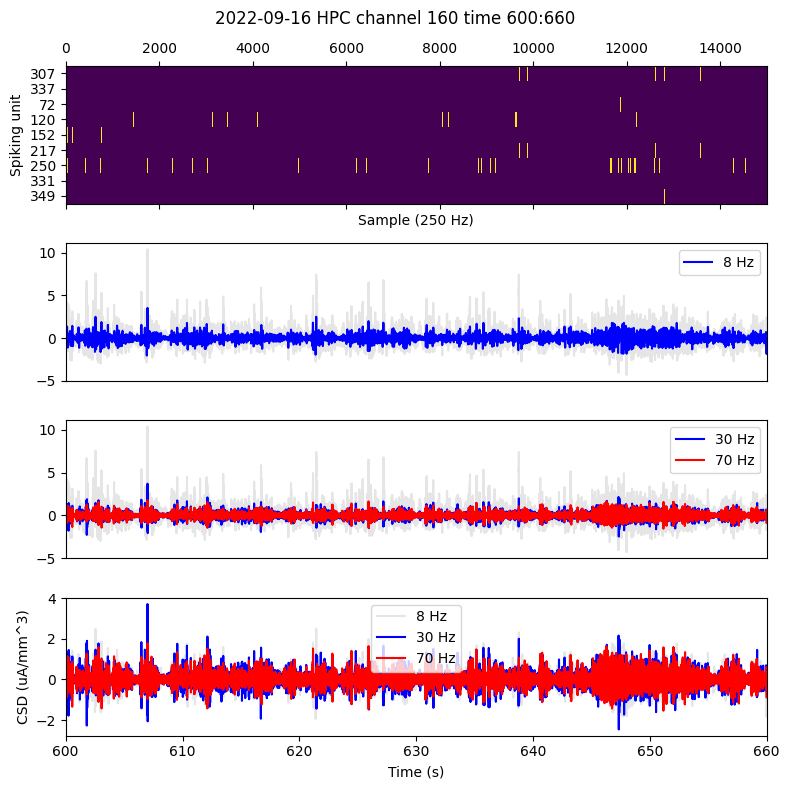

In [28]:
plot_spikes_csd(600, 660)
plt.savefig(f'{date}-hpc-channel-{channel}-minute-10-spikes-csd.png', dpi=200)
plt.show()

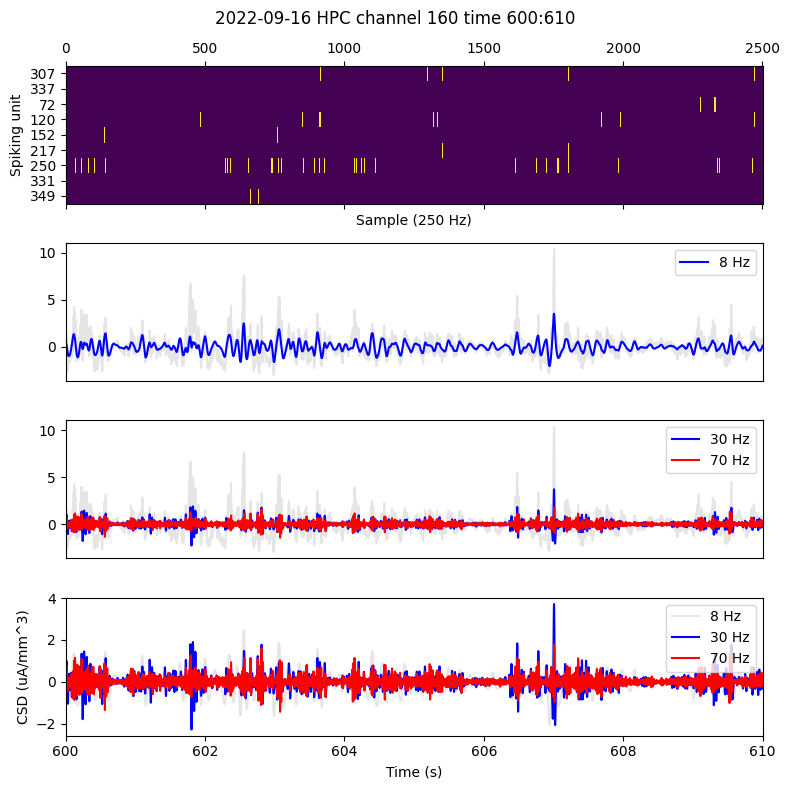

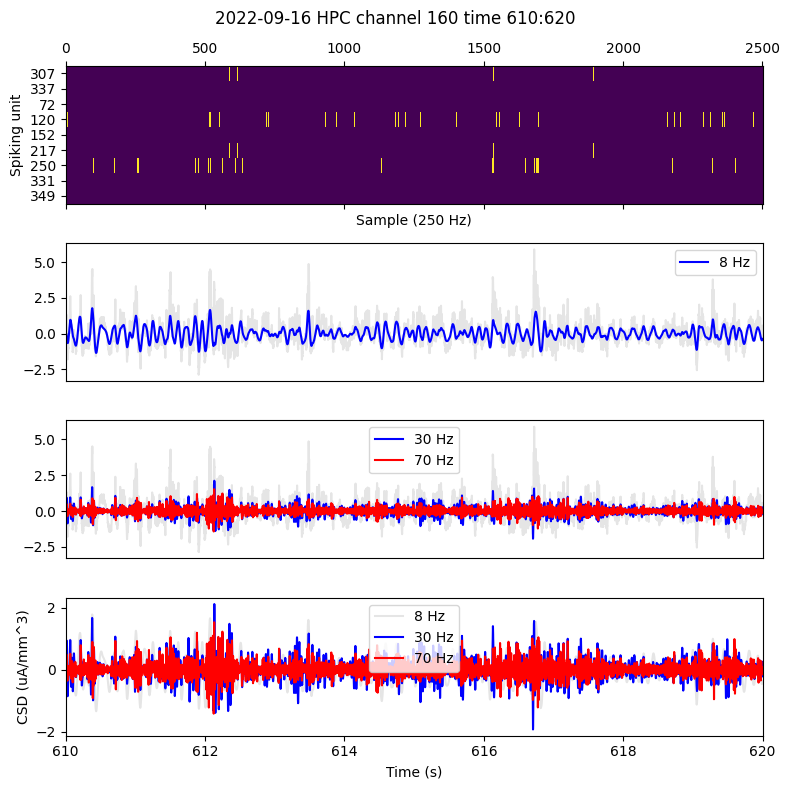

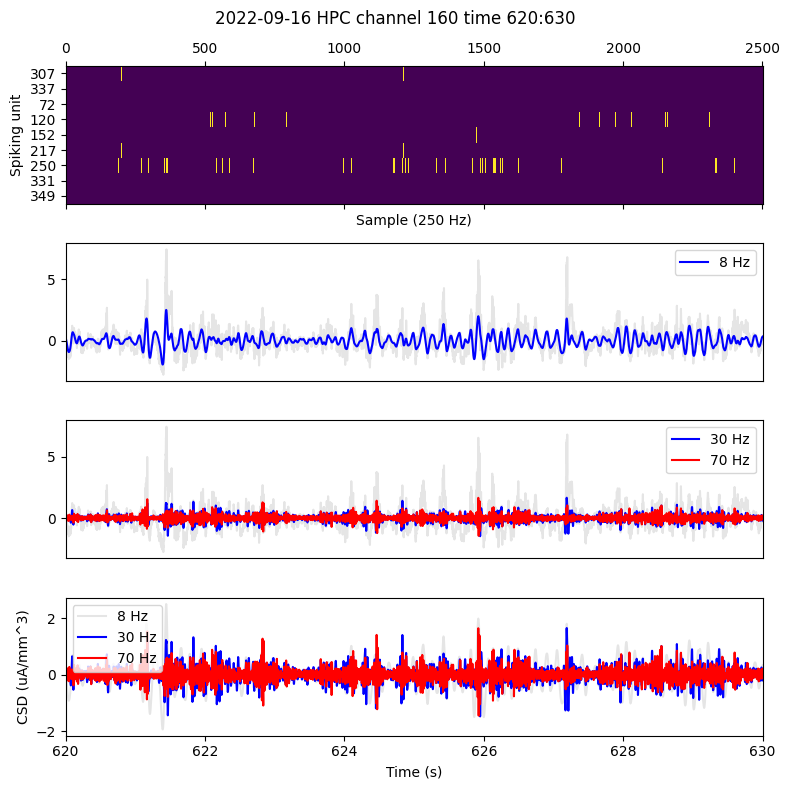

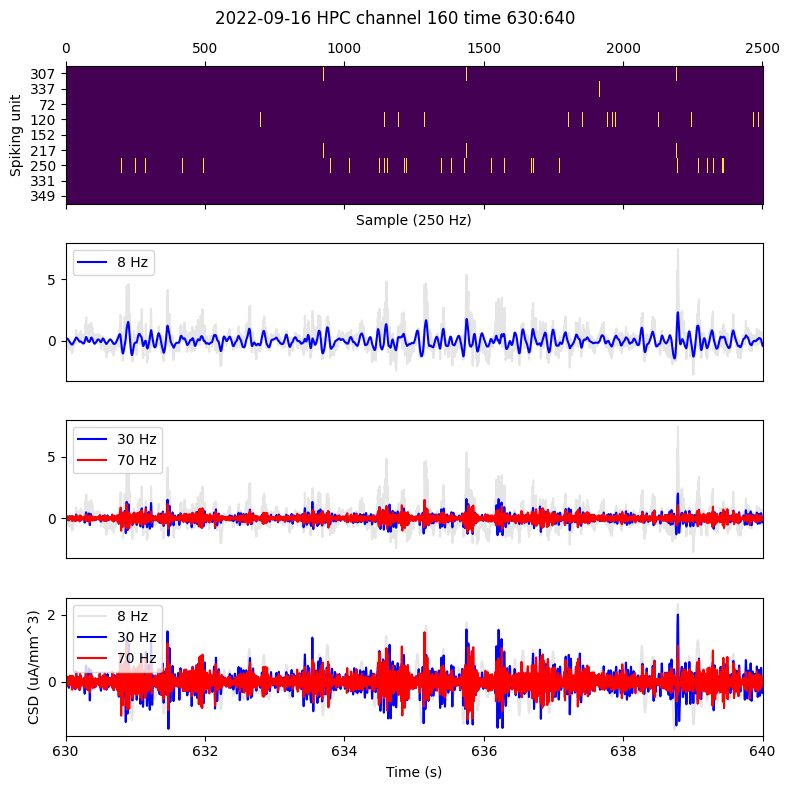

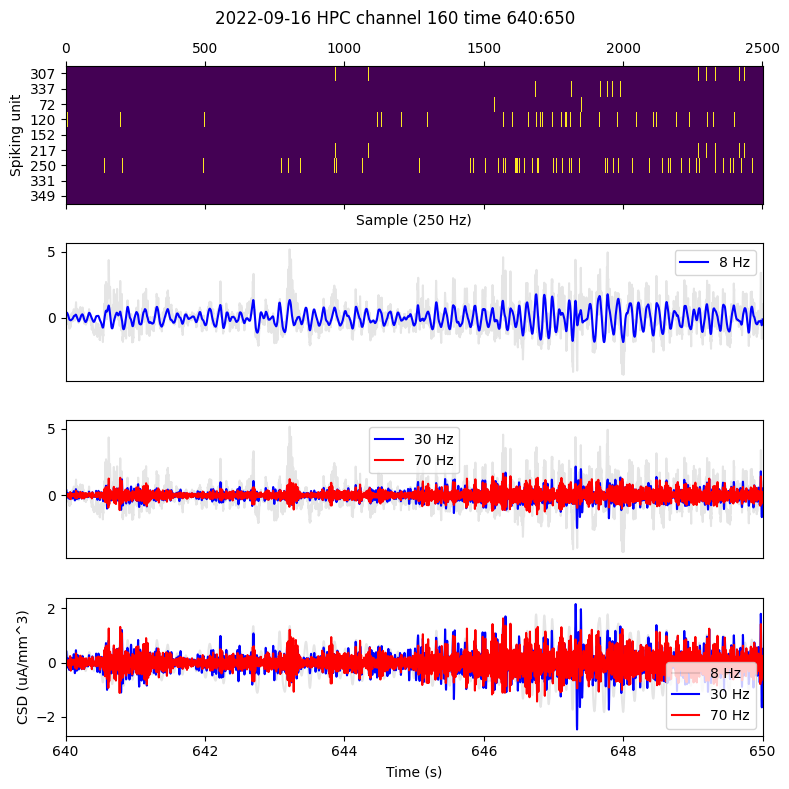

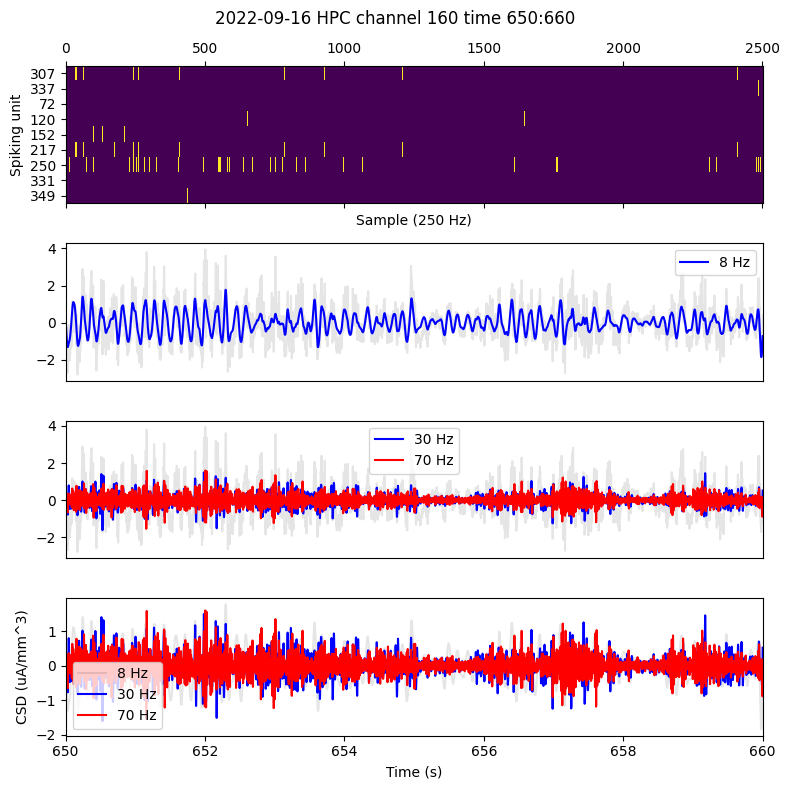

In [30]:
for i in range(6):
    start = 600 + 10 * i
    end = 600 + 10 * (i + 1)
    plot_spikes_csd(start, end)
    plt.savefig(f'{date}-hpc-channel-{channel}-time-{start}-{end}-spikes-csd.png', dpi=200)